# Importing Relevant Packages

In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading and Analysing Data

In [308]:
data = pd.read_csv(r'C:\upgrad assignments\Linear Regression\Datasets\day.csv')
data.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [310]:
# As the date column is already splitted into multiple columns so we can drop it.
# Also we can remove columns like 'instant' as the it's more like serial number column and columns like 'registered' & 'casual'
# as their sum represent cnt

data.drop(['instant','dteday', 'casual', 'registered'], axis=1, inplace=True)

In [311]:
# Another observation is that temp and atemp are mostly correlayted so they can cause a problem of multicollinearity, hence it's better
# to drop one of them.

data.drop(['temp'], axis=1, inplace=True)

In [312]:
# Lets convert columns like 'season', 'weekday' & 'month' to categorical type
    
data['season'] = data['season'].astype("category")
data['weekday'] = data['weekday'].astype("category")
data['mnth'] = data['mnth'].astype("category")
data['weathersit'] = data['weathersit'].astype("category")

In [313]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349


In [314]:
# Checking missing values

data.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [315]:
# Check for duplicated rows

data[data.duplicated()]

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt


# EDA

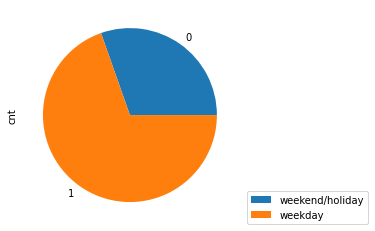

In [345]:
# Bike share demand during weekdays and weekends
fig, ax = plt.subplots()
data.groupby(["workingday"])["cnt"].sum().plot.pie()
ax.legend(["weekend/holiday", "weekday"],loc=(1.04,0))

The above graph shows that the demand for bike share is maximum for weekdays than weekends/holidays

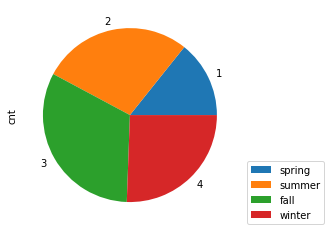

In [344]:
# Bike share demand during different weather conditions
fig, ax = plt.subplots()
data.groupby(["season"])["cnt"].sum().plot.pie()
ax.legend(["spring", "summer", "fall", "winter"],loc=(1.04,0))

<AxesSubplot:xlabel='season'>

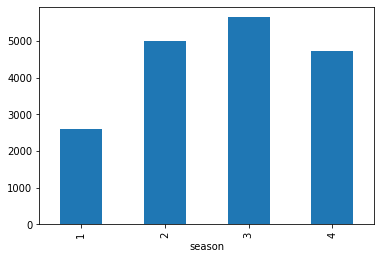

In [353]:
# As pie plot is difficult to interpret we will go with barchart
data.groupby("season")["cnt"].mean().plot.bar()

Here we can see the demand of bike share is maximum in fall and summer season.

<AxesSubplot:xlabel='weekday'>

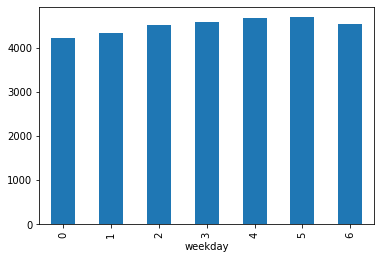

In [352]:
data.groupby("weekday")["cnt"].mean().plot.bar()

We can see that bike share demand increases as week progresses but decreases to some extent at the weekend.

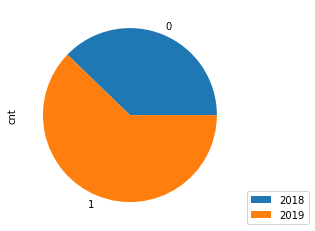

In [354]:
fig, ax = plt.subplots()
data.groupby("yr")["cnt"].mean().plot.pie()
ax.legend(["2018", "2019"],loc=(1.04,0))

Here we can see that the demand for bike share has been maximum in the year 2019 than 2018

<AxesSubplot:xlabel='yr,mnth'>

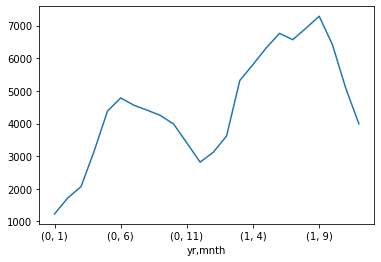

In [201]:
data.groupby(["yr","mnth"])["cnt"].mean().plot()

 From above gaph we can see that the demand for bike share has from 2018 to 2019 but then again there is dip in 2019 in the month of September

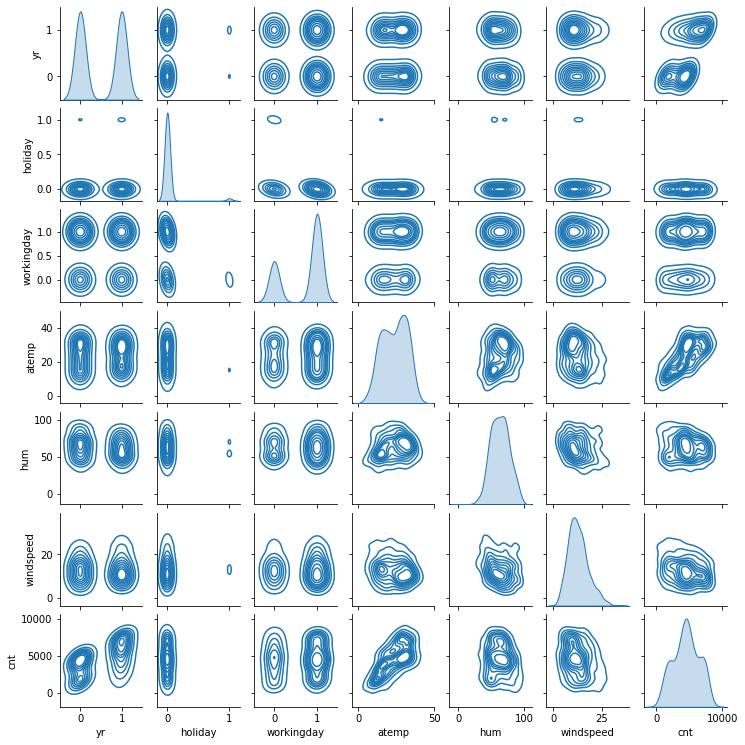

In [362]:
sns.pairplot(data,  kind="kde", height=1.5)

From above pair plot we can see that atemp has the most linear relationship with the target cnt

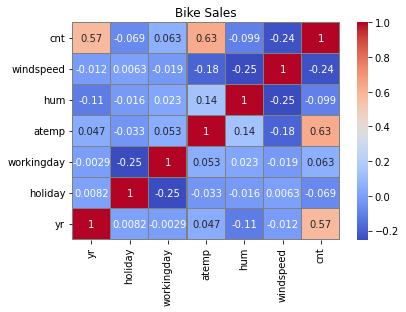

In [377]:
# Plottinh heatmap showing the correlation of different features with the target

res = sns.heatmap(data.corr(), annot=True, robust=True, cmap="coolwarm",
                  linewidths=0.1, linecolor='gray')
res.invert_yaxis()
plt.title('Bike Sales')

plt.show()

From above plot we can see that atemp has the highest correlation of 0.63 with the target cnt.

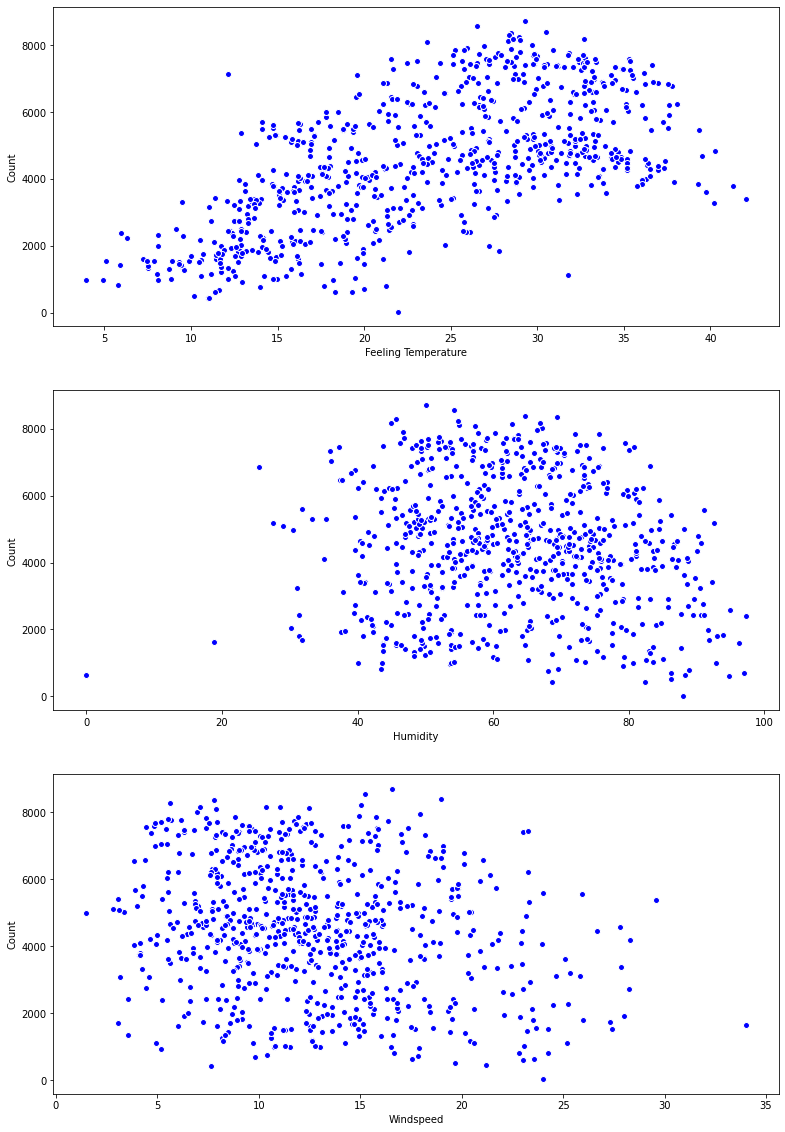

In [202]:
fig, ax = plt.subplots(3, figsize=(13, 20))

ax[0].scatter(data.atemp, data.cnt, color = "blue", edgecolors = "white")
ax[0].set_xlabel("Feeling Temperature")
ax[0].set_ylabel("Count")

ax[1].scatter(data.hum, data.cnt, color = "blue", edgecolors = "white")
ax[1].set_xlabel("Humidity")
ax[1].set_ylabel("Count")

ax[2].scatter(data.windspeed, data.cnt, color = "blue", edgecolors = "white")
ax[2].set_xlabel("Windspeed")
ax[2].set_ylabel("Count")

plt.show()

Fom above plots we can see that there is some linear relationship between count, feeling temperature , humidity and windspeed but how much these variables impact the cnt column we will see in the Feature Selection part.

# Splitting Data into training and test set

In [203]:
# Creating dummy variable for categorical columns

data = pd.get_dummies(data, drop_first=True)

In [204]:
data.head(2)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [205]:
data.shape

(730, 29)

In [207]:
# Splitting data into training and testing set

np.random.seed(0)
train_frame, test_frame = train_test_split(data, train_size = 0.80, test_size = 0.20, random_state = 42)

In [208]:
train_frame.shape

(584, 29)

In [209]:
# Scaling values of columns like 'atemp', 'hum', 'cnt' and 'windspeed'

scaler = MinMaxScaler()

col_names = ['atemp', 'hum', 'windspeed','cnt']

train_frame[col_names] = scaler.fit_transform(train_frame[col_names])

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [210]:
train_frame.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,0.527193,0.654151,0.410017,0.520520,0.250000,0.265411,0.255137,...,0.089041,0.075342,0.147260,0.138699,0.138699,0.147260,0.133562,0.143836,0.344178,0.032534
std,0.500285,0.177566,0.469540,0.212483,0.146644,0.187249,0.224926,0.433384,0.441930,0.436312,...,0.285047,0.264169,0.354669,0.345928,0.345928,0.354669,0.340472,0.351224,0.475507,0.177566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353829,0.542745,0.276424,0.371088,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.558730,0.657578,0.379465,0.523527,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698392,0.757346,0.520978,0.691872,0.250000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

In [211]:
y_train = train_frame.pop('cnt')
X_train = train_frame

In [212]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [213]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 9),
 ('mnth_5', False, 14),
 ('mnth_6', False, 11),
 ('mnth_7', False, 7),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', False, 13),
 ('mnth_11', False, 3),
 ('mnth_12', False, 4),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 6),
 ('weathersit_3', True, 1)]

In [214]:
for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 12.000
Column: 10, Selected False, Rank: 8.000
Column: 11, Selected False, Rank: 9.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected False, Rank: 11.000
Column: 14, Selected False, Rank: 7.000
Column: 15, Selected False, Rank: 10.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 13.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected False, Rank: 4.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selecte

In [215]:
selected_columns = X_train.columns[rfe.support_]

In [216]:
selected_columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [217]:
rfe_selected_columns = X_train[selected_columns]

In [218]:
# Function to generate VIF score

def get_vif_score(frame):
    vif_frame = pd.DataFrame()
    vif_frame['Selected_features'] = frame.columns
    vif_frame['VIF_score'] = [variance_inflation_factor(frame.values, i) for i in range(frame.shape[1])]
    vif_frame['VIF_score'] = round(vif_frame['VIF_score'], 2)
    vif_frame = vif_frame.sort_values(by = "VIF_score", ascending = False)
    return vif_frame 

In [219]:
get_vif_score(rfe_selected_columns)

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Selected_features,VIF_score
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,11.57
3,atemp,7.47
5,windspeed,4.46


# Model Building

## Model1

In [220]:
import statsmodels.api as sm

# Add a constant
X_train_lr1 = sm.add_constant(rfe_selected_columns)

# Create a first fitted model
model1 = sm.OLS(y_train, X_train_lr1).fit()

In [221]:
lr1.params

const           0.241201
yr              0.221252
holiday        -0.052606
workingday      0.018995
atemp           0.634361
hum            -0.276760
windspeed      -0.135838
season_2        0.088064
season_4        0.144097
mnth_9          0.108128
weekday_1      -0.022862
weekday_2      -0.012695
weekday_3       0.006235
weekday_4      -0.005905
weekday_5       0.001617
weathersit_3   -0.179637
dtype: float64

In [222]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     183.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.77e-200
Time:                        18:52:50   Log-Likelihood:                 541.10
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     569   BIC:                            -986.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2412      0.027      8.878   

In [223]:
rfe_selected_columns1 = rfe_selected_columns.drop(["weekday_5"], axis = 1)

In [225]:
get_vif_score(rfe_selected_columns1)

,Selected_features,VIF_score
4,hum,11.57
3,atemp,7.47
2,workingday,7.19
5,windspeed,4.46
9,weekday_1,2.19
12,weekday_4,2.12
11,weekday_3,2.08
10,weekday_2,2.05
0,yr,2.00
6,season_2,1.63


As we can see there are multiple columns having p-value > 0.05 , also columns like hum, atemp and wokingday has vif >5 so we will be removing columns having higher p-value and vif score on each iteration till we reach a point having all the columns with low p-value and vif score.

## Model2

In [226]:
# Add a constant
rfe_selected_columns2 = sm.add_constant(rfe_selected_columns1)

# Create a first fitted model
model2 = sm.OLS(y_train, rfe_selected_columns2).fit()

In [227]:
model2.params

const           0.241201
yr              0.221252
holiday        -0.050988
workingday      0.020613
atemp           0.634361
hum            -0.276760
windspeed      -0.135838
season_2        0.088064
season_4        0.144097
mnth_9          0.108128
weekday_1      -0.024480
weekday_2      -0.014312
weekday_3       0.004617
weekday_4      -0.007522
weathersit_3   -0.179637
dtype: float64

In [228]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     183.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.77e-200
Time:                        18:54:19   Log-Likelihood:                 541.10
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     569   BIC:                            -986.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2412      0.027      8.878   

In [229]:
rfe_selected_columns3 = rfe_selected_columns2.drop(["weekday_3"], axis = 1)

In [230]:
get_vif_score(rfe_selected_columns3)

,Selected_features,VIF_score
0,const,45.70
3,workingday,1.58
10,weekday_1,1.40
12,weekday_4,1.33
11,weekday_2,1.31
2,holiday,1.28
5,hum,1.26
8,season_4,1.23
7,season_2,1.22
4,atemp,1.19


## Model3

In [231]:
# Add a constant
rfe_selected_columns4 = sm.add_constant(rfe_selected_columns3)

# Create a first fitted model
model3 = sm.OLS(y_train, rfe_selected_columns4).fit()

In [232]:
model3.params

const           0.240892
yr              0.221193
holiday        -0.048767
workingday      0.022941
atemp           0.634504
hum            -0.276325
windspeed      -0.135867
season_2        0.088014
season_4        0.144068
mnth_9          0.108085
weekday_1      -0.026789
weekday_2      -0.016663
weekday_4      -0.009846
weathersit_3   -0.178860
dtype: float64

In [233]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          3.48e-201
Time:                        18:55:41   Log-Likelihood:                 541.06
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     570   BIC:                            -992.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2409      0.027      8.880   

In [234]:
rfe_selected_columns5 = rfe_selected_columns4.drop(["weekday_4"], axis = 1)

In [235]:
get_vif_score(rfe_selected_columns5)

,Selected_features,VIF_score
0,const,45.59
3,workingday,1.29
5,hum,1.25
10,weekday_1,1.24
2,holiday,1.23
7,season_2,1.22
8,season_4,1.22
4,atemp,1.19
6,windspeed,1.16
11,weekday_2,1.16


## Model4

In [236]:
# Add a constant
rfe_selected_columns6 = sm.add_constant(rfe_selected_columns5)

# Create a first fitted model
model4 = sm.OLS(y_train, rfe_selected_columns6).fit()

In [237]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          3.09e-202
Time:                        18:56:58   Log-Likelihood:                 540.77
No. Observations:                 584   AIC:                            -1056.
Df Residuals:                     571   BIC:                            -998.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2399      0.027      8.858   

In [238]:
rfe_selected_columns7 = rfe_selected_columns6.drop(["weekday_2"], axis = 1)

In [239]:
get_vif_score(rfe_selected_columns7)

,Selected_features,VIF_score
0,const,45.28
5,hum,1.24
2,holiday,1.22
7,season_2,1.22
8,season_4,1.22
4,atemp,1.19
3,workingday,1.16
6,windspeed,1.16
10,weekday_1,1.16
11,weathersit_3,1.15


## Model5

In [240]:
# Add a constant
rfe_selected_columns8 = sm.add_constant(rfe_selected_columns7)

# Create a first fitted model
model5 = sm.OLS(y_train, rfe_selected_columns8).fit()

In [241]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          3.46e-203
Time:                        18:57:55   Log-Likelihood:                 540.19
No. Observations:                 584   AIC:                            -1056.
Df Residuals:                     572   BIC:                            -1004.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2423      0.027      8.976   

In [242]:
rfe_selected_columns8 = rfe_selected_columns7.drop(["weekday_1"], axis = 1)

In [243]:
get_vif_score(rfe_selected_columns8)

,Selected_features,VIF_score
0,const,45.11
5,hum,1.24
7,season_2,1.22
8,season_4,1.22
4,atemp,1.19
6,windspeed,1.16
10,weathersit_3,1.14
9,mnth_9,1.12
3,workingday,1.09
2,holiday,1.08


## Model6

In [244]:
# Add a constant
rfe_selected_columns9 = sm.add_constant(rfe_selected_columns8)

# Create a first fitted model
model6 = sm.OLS(y_train, rfe_selected_columns9).fit()

In [245]:
model6.params

const           0.245042
yr              0.220775
holiday        -0.068999
workingday      0.012417
atemp           0.634428
hum            -0.280111
windspeed      -0.139327
season_2        0.087989
season_4        0.143502
mnth_9          0.108883
weathersit_3   -0.175293
dtype: float64

In [246]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     255.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.03e-204
Time:                        18:59:31   Log-Likelihood:                 538.82
No. Observations:                 584   AIC:                            -1056.
Df Residuals:                     573   BIC:                            -1008.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2450      0.027      9.081   

In [247]:
rfe_selected_columns10 = rfe_selected_columns9.drop(["workingday"], axis = 1)

In [248]:
get_vif_score(rfe_selected_columns10)

,Selected_features,VIF_score
0,const,43.31
4,hum,1.24
6,season_2,1.22
7,season_4,1.22
3,atemp,1.19
5,windspeed,1.16
9,weathersit_3,1.14
8,mnth_9,1.12
1,yr,1.02
2,holiday,1.01


## Model7

In [249]:
# Add a constant
rfe_selected_columns11 = sm.add_constant(rfe_selected_columns10)

# Create a first fitted model
model7 = sm.OLS(y_train, rfe_selected_columns11).fit()

In [250]:
model7.params

const           0.252541
yr              0.220608
holiday        -0.077384
atemp           0.636551
hum            -0.279660
windspeed      -0.140402
season_2        0.088470
season_4        0.143830
mnth_9          0.109032
weathersit_3   -0.174547
dtype: float64

In [251]:
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     283.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.21e-204
Time:                        19:01:50   Log-Likelihood:                 537.84
No. Observations:                 584   AIC:                            -1056.
Df Residuals:                     574   BIC:                            -1012.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2525      0.026      9.544   

In [254]:
get_vif_score(rfe_selected_columns11)

,Selected_features,VIF_score
0,const,43.31
4,hum,1.24
6,season_2,1.22
7,season_4,1.22
3,atemp,1.19
5,windspeed,1.16
9,weathersit_3,1.14
8,mnth_9,1.12
1,yr,1.02
2,holiday,1.01


In [295]:
def adjusted_r2(n,p,r2):
    
    return round(1-(1-r2)*(n-1)/(n-p-1),3)

## Making Predictions on training data and analysing residuals

In [280]:
y_train_pred = model7.predict(rfe_selected_columns11)

In [291]:
# Calculate R2

from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8162360407791572

In [296]:
# Calcualte Adjusted R2

train_n = rfe_selected_columns11.shape[0]  # Number of rows

train_p = rfe_selected_columns11.shape[1] # Number of predictors

train_r2 = 0.8162

adjusted_r2(train_n, train_p, train_r2)

0.813

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

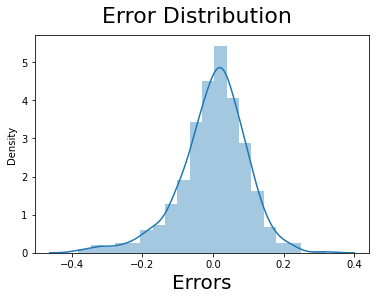

In [356]:
res = y_train-y_train_pred

# Plot the histogram of the residual terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Distribution', fontsize = 22)         
plt.xlabel('Errors', fontsize = 20)  

From above plot we can see the distribution of residuals is Normal in nature, hence its fits the assumption of Linear Regression

## Transforming Test data and making predictions on it.

In [267]:
# Transform columns that we transformed in training data to prepare our Test data
col_names = ['atemp', 'hum', 'windspeed','cnt']

test_frame[col_names] = scaler.transform(test_frame[col_names])

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [269]:
# Selected columns on which model was trained to be used in test data

train_columns = rfe_selected_columns11.loc[:, rfe_selected_columns11.columns!='const'].columns

In [270]:
train_columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weathersit_3'],
      dtype='object')

In [271]:
# Creating test data using the extracted columns

X_test = test_frame[train_columns]

In [273]:
# Adding constants to the test data

X_test_model7 = sm.add_constant(X_test)
X_test_model7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 468 to 260
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         146 non-null    float64
 1   yr            146 non-null    int64  
 2   holiday       146 non-null    int64  
 3   atemp         146 non-null    float64
 4   hum           146 non-null    float64
 5   windspeed     146 non-null    float64
 6   season_2      146 non-null    uint8  
 7   season_4      146 non-null    uint8  
 8   mnth_9        146 non-null    uint8  
 9   weathersit_3  146 non-null    uint8  
dtypes: float64(4), int64(2), uint8(4)
memory usage: 8.6 KB


In [274]:
y_pred = model7.predict(X_test_model7)

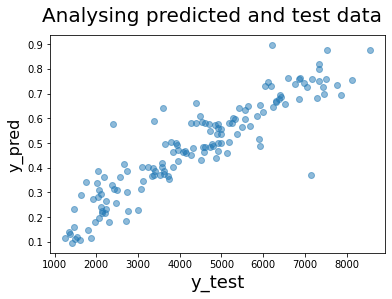

In [298]:
# Plotting y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Analysing predicted and test data', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)  
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [290]:
# Genetrating R2 for test data

from sklearn.metrics import r2_score
r2_score(test_frame.cnt, y_pred)

0.825665998223019

In [297]:
test_r2 = 0.825665998223019

test_n = X_test.shape[0] # Number of rows
 
test_p = X_test.shape[1] # Number of predictors
 
adjusted_r2(test_n,test_p,test_r2) # Using adjusted R2 function

0.814

<b> Results upto three places of decimal </b> <br> <br>
R2 for Training set : 0.816 <br>
R2 for Testing set : 0.825 <br> <br>
Adjusted R2 for Testing set : 0.814 <br>
Adjusted R2 for Training set : 0.813